# Wine Classifier
## Data Exploration

### Table of Contents

1. [Data Exploration](#exploration)
    1. [Load the data](#load)
    2. [Explore the data](#explore)
    3. [Missing values and data types](#values_types)
    4. [Correlations](#correlations)

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, HTML, Markdown as md
import matplotlib.pyplot as plt

# Config
%matplotlib notebook
pd.options.display.max_columns = None

## Data Exploration<a id="exploration"></a>
### Load the data<a id="load"></a>
Loads *.csv* file into *pandas DataFrame*. The *raw* *.csv* file doesn't have fieldnames.

In [20]:
features = ["label", "alcohol", "malic_acid", "ash", "ash_alcalinity", "magnesium", "phenols", "flavanoids", 
            "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280_od315", "proline"]
df = pd.read_csv("data/raw/wine.csv", names=features)

### Explore the data<a id="explore"></a>
First look at the data. 

In [21]:
# Takes a look at the DataFrame's shape.
display(md("**Initial** DataFrame's shape: {0}".format(df.shape)))

# First rows
display(df.head())

**Initial** DataFrame's shape: (178, 14)

label  alcohol  malic_acid   ash  ash_alcalinity  magnesium  phenols  \
0      1    14.23        1.71  2.43            15.6        127     2.80   
1      1    13.20        1.78  2.14            11.2        100     2.65   
2      1    13.16        2.36  2.67            18.6        101     2.80   
3      1    14.37        1.95  2.50            16.8        113     3.85   
4      1    13.24        2.59  2.87            21.0        118     2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280_od315  proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

### Missing values and data types<a id="values_types"></a>
All values are **numbers**, and there are not **missing values**.

In [22]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
label                   178 non-null int64
alcohol                 178 non-null float64
malic_acid              178 non-null float64
ash                     178 non-null float64
ash_alcalinity          178 non-null float64
magnesium               178 non-null int64
phenols                 178 non-null float64
flavanoids              178 non-null float64
nonflavanoid_phenols    178 non-null float64
proanthocyanins         178 non-null float64
color_intensity         178 non-null float64
hue                     178 non-null float64
od280_od315             178 non-null float64
proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


None

### Correlations<a id="correlations"></a>
Let's explore the correlations between the features. There are some features that are strongly correlated (e.g: *flavanoids* with *phenols*, and *od280_od315* with *flavanoids*)

<IPython.core.display.Javascript object>


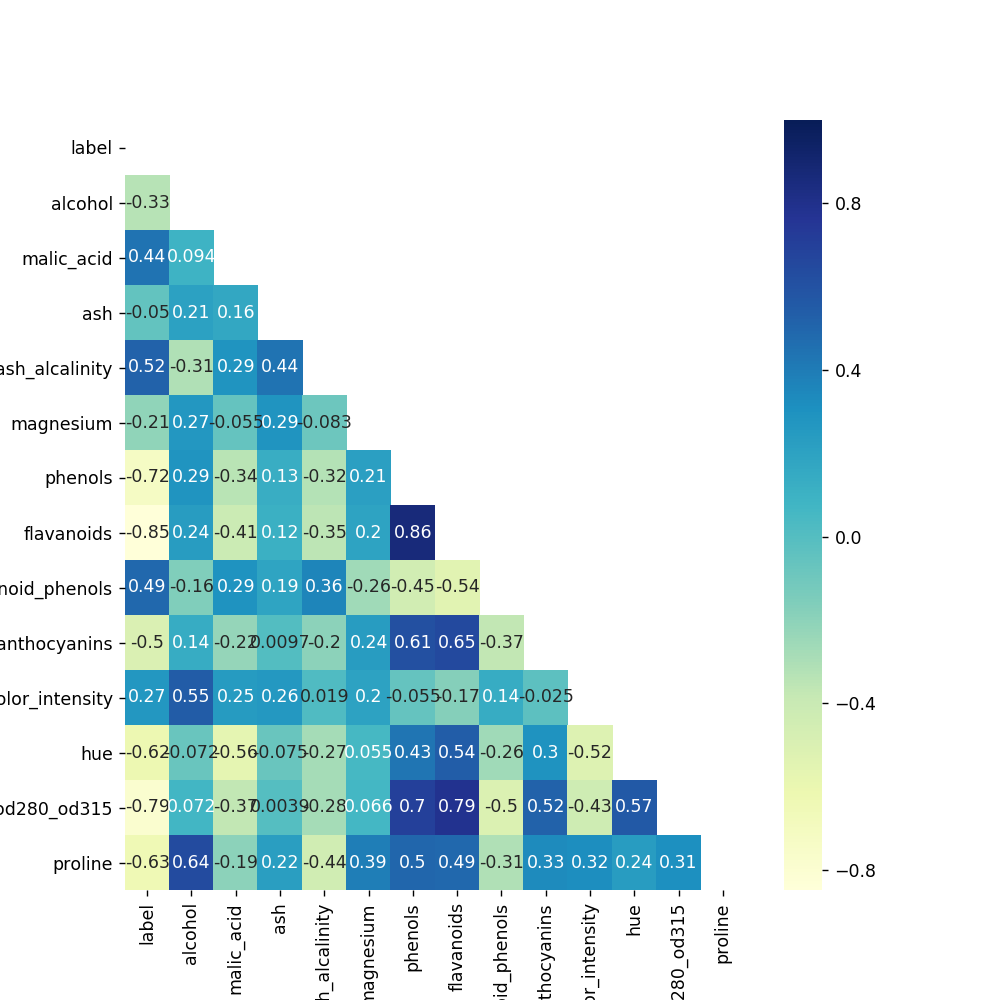

In [23]:
# Correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corr_matrix, mask=mask, cmap="YlGnBu", annot=True)

<IPython.core.display.Javascript object>


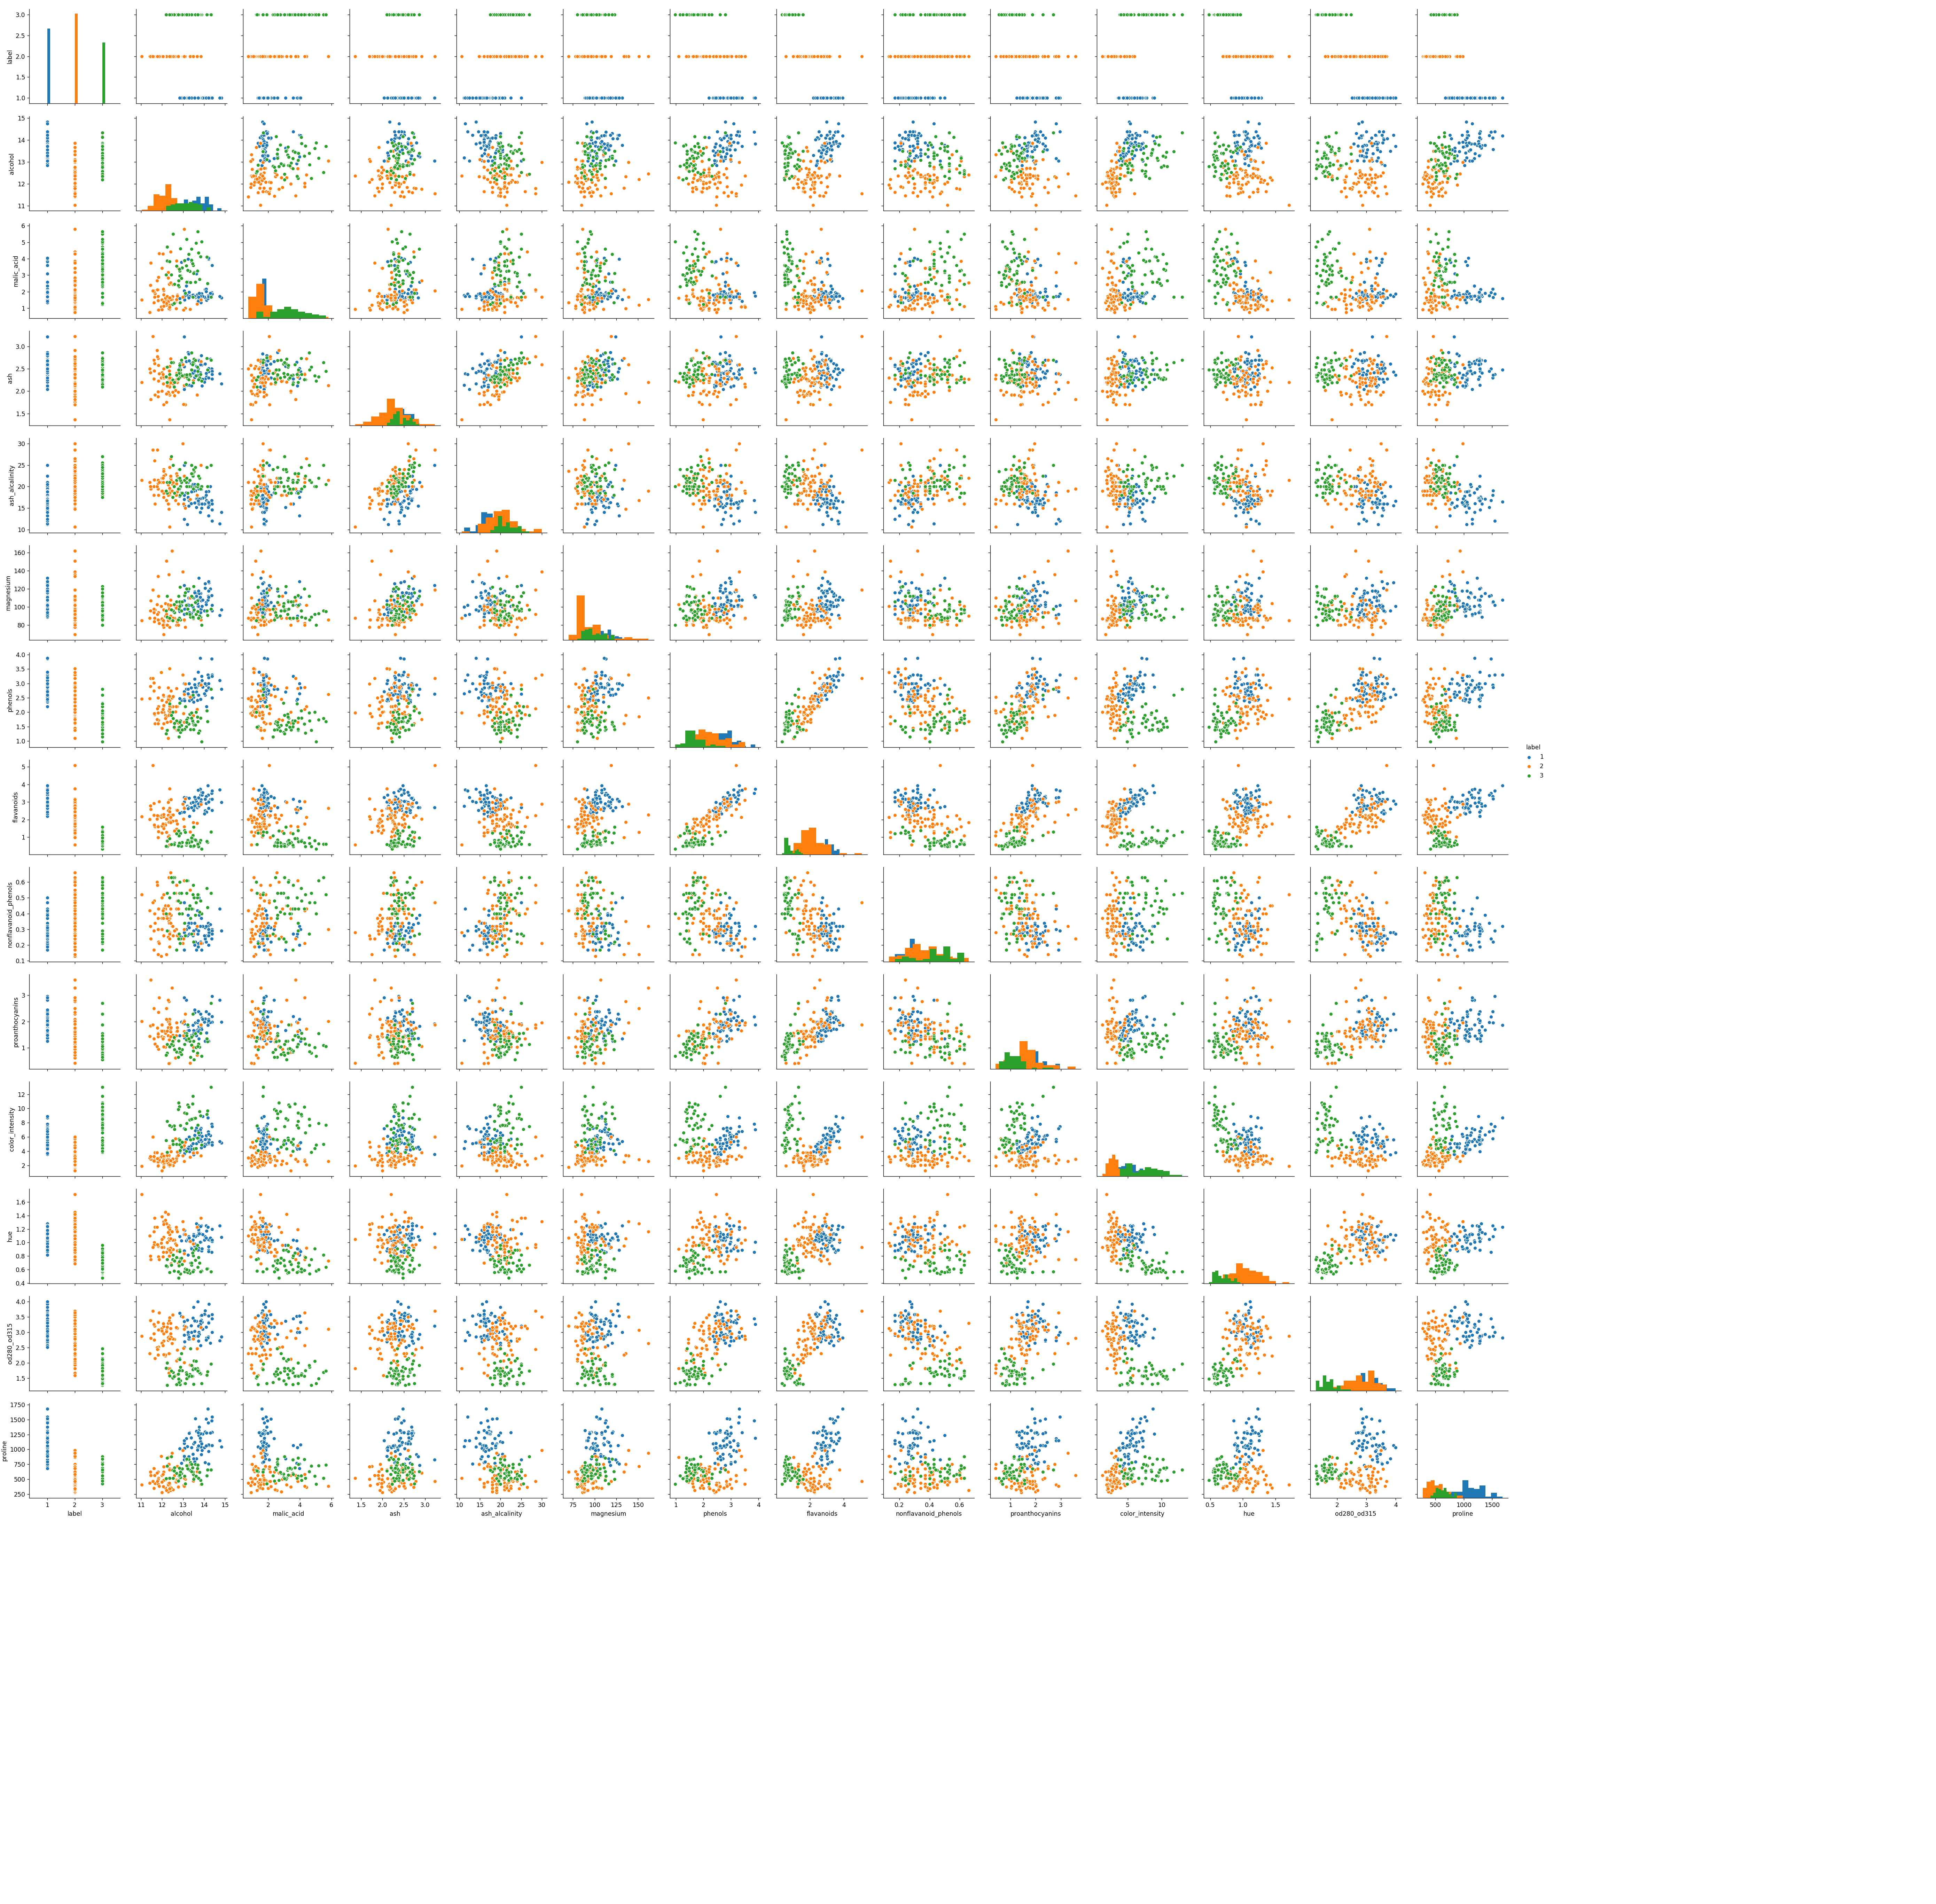

In [24]:
sns.pairplot(df, hue="label", diag_kind="hist")